In [ ]:
# This makes a block diagram from information in the FITS headers

In [1]:
## For a demo of how this notebook works, download the fake FITS files in the directory
## YOURUSERNAME@lbti-cdata:/mnt/iscsi/lmircam/L0/fake_fits
## to the directory /fake_fits/ within the directory this notebook is in.
## Then proceed through the following steps. Edit this notebook as you wish
## once you are ready to run it on your own data

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from astropy.io import fits
import pandas as pd
from datetime import datetime
#%matplotlib inline

In [3]:
# stem 

stem = ('.')

In [5]:
# read in FITS header data to get filter info
full_table = pd.read_csv('./data/meta_data_190224_fizeau_tests.csv')

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# sort table by frame number (a few are out of order)

full_table.sort_values(["FRAMENUM"], inplace=True)
full_table = full_table.reset_index(drop=True) # reset indices and don't keep the old ones

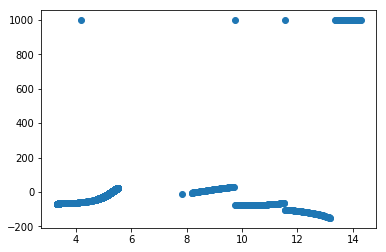

In [7]:
plt.scatter(full_table['LBT_UTC'],full_table['LBT_PARA'])
plt.show()

In [9]:
# print all keys

for i in range(0,200):
    print(full_table.keys()[i])

Unnamed: 0
AGE_STOP
BADROWS
BITPIX
CAPCOMP
COMMENT
COMTTEMP
CPTEMP
CTLRTEMP
DATAFLAG
DATE-OBS
DETECTOR
DETTEMP
DIMMFLUX
EXPMODE
EXPTIME
EXTEND
FILENAME
FILTPOLE
FLAG
FPCAZM
FPCAZS
FPCELM
FPCELS
FPCPISTM
FPCPISTS
FRAME
FRAMENUM
GAIN
IL_HORIZ
INSTRUME
ITIME
LBTTEMP
LBT_AIRM
LBT_ALT
LBT_AZ
LBT_DEC
LBT_LST
LBT_LXOS
LBT_LYOS
LBT_PARA
LBT_RA
LBT_RXOS
LBT_RYOS
LBT_UTC
LCMODES
LGAIN
LLOOPON
LMIR_FW1
LMIR_FW2
LMIR_FW3
LMIR_FW4
LMRHTPOW
LMRHTSET
LMRHTVAL
LM_APWHL
LM_FW25
LM_MAGWL
LOFFSETX
LOFFSETY
LOFFSETZ
LOPTTEMP
LSLNULL
LSTATUS
LTTMODUL
LWBCTEMP
LWCCDBIN
LWCCDFRQ
LWIND1S
NAXIS
NAXIS1
NAXIS2
NAXIS3
NCBMDVT
NCOADDS
NDROPS
NGROUPS
NIC_NAC
NIL_NDFW
NIL_OPW
NIL_PRW
NLDCRC
NLMGTLT
NLNCNC
NLPPLTLT
NLWNTRNS
NMCMSLD
NODPOS
NOUTPUTS
NRAMPS
NREADS
NRESETS
PCB1X
PCB1Y
PCBRAD
PCCLOSED
PCFJMPS
PCJD
PCLAMB1
PCLAMB2
PCLOOPHZ
PCMSNR1
PCMSNR2
PCPHMCS1
PCPHMCS2
PCPHMEN1
PCPHMEN2
PCPHMSN1
PCPHMSN2
PCPHSTD1
PCPHSTD2
PCPLDG
PCPLIG
PCPLPG
PCPLSP01
PCPLSP1
PCSSPER
PCTIPSP
PCTLTSP
PID
PIL_VERT
RAMPTIM
RCMODES
RESIZFA

IndexError: index 154 is out of bounds for axis 0 with size 154

In [13]:
len(full_table)

7165

In [16]:
# print stuff to screen

for t in range(0,8000):
    print('FRAMENUM: '+str(full_table['FRAMENUM'][t])+
          #'| FW1: '+str(full_table['LMIR_FW1'][t])+
          #'| FW3: '+str(full_table['LMIR_FW3'][t])+
          '| ITIME: '+str(full_table['ITIME'][t])+
          #'| FW3: '+str(full_table['LMIR_FW3'][t])+
          '| LBT_UTC: '+str(full_table['LBT_UTC'][t])+
          #'| PA: '+str(full_table['LBT_PARA'][t]))
          '| PCCLOSED: '+str(full_table['PCCLOSED'][t]))

FRAMENUM: 1| ITIME: 1002.65| LBT_UTC: 3.3207| PCCLOSED: 0.0
FRAMENUM: 2| ITIME: 1002.65| LBT_UTC: 3.320979| PCCLOSED: 0.0
FRAMENUM: 3| ITIME: 1002.65| LBT_UTC: 3.321257| PCCLOSED: 0.0
FRAMENUM: 4| ITIME: 1002.65| LBT_UTC: 3.321535| PCCLOSED: 0.0
FRAMENUM: 5| ITIME: 1002.65| LBT_UTC: 3.3218129999999997| PCCLOSED: 0.0
FRAMENUM: 6| ITIME: 1002.65| LBT_UTC: 3.3220910000000003| PCCLOSED: 0.0
FRAMENUM: 7| ITIME: 1002.65| LBT_UTC: 3.32237| PCCLOSED: 0.0
FRAMENUM: 8| ITIME: 1002.65| LBT_UTC: 3.3226480000000005| PCCLOSED: 0.0
FRAMENUM: 9| ITIME: 1002.65| LBT_UTC: 3.3229260000000003| PCCLOSED: 0.0
FRAMENUM: 10| ITIME: 1002.65| LBT_UTC: 3.323205| PCCLOSED: 0.0
FRAMENUM: 11| ITIME: 1002.65| LBT_UTC: 3.323483| PCCLOSED: 0.0
FRAMENUM: 12| ITIME: 1002.65| LBT_UTC: 3.323761| PCCLOSED: 0.0
FRAMENUM: 13| ITIME: 1002.65| LBT_UTC: 3.324039| PCCLOSED: 0.0
FRAMENUM: 14| ITIME: 1002.65| LBT_UTC: 3.3243169999999997| PCCLOSED: 0.0
FRAMENUM: 15| ITIME: 1002.65| LBT_UTC: 3.324735| PCCLOSED: 0.0
FRAMENUM: 16| ITI

FRAMENUM: 1218| ITIME: 1002.65| LBT_UTC: 3.757394| PCCLOSED: 0.0
FRAMENUM: 1219| ITIME: 1002.65| LBT_UTC: 3.7576730000000005| PCCLOSED: 0.0
FRAMENUM: 1220| ITIME: 1002.65| LBT_UTC: 3.7579510000000003| PCCLOSED: 0.0
FRAMENUM: 1221| ITIME: 1002.65| LBT_UTC: 3.758229| PCCLOSED: 0.0
FRAMENUM: 1222| ITIME: 1002.65| LBT_UTC: 3.758507| PCCLOSED: 0.0
FRAMENUM: 1223| ITIME: 1002.65| LBT_UTC: 3.758785| PCCLOSED: 0.0
FRAMENUM: 1224| ITIME: 1002.65| LBT_UTC: 3.759064| PCCLOSED: 0.0
FRAMENUM: 1225| ITIME: 1002.65| LBT_UTC: 3.7593419999999997| PCCLOSED: 0.0
FRAMENUM: 1226| ITIME: 1002.65| LBT_UTC: 3.7596199999999995| PCCLOSED: 0.0
FRAMENUM: 1227| ITIME: 1002.65| LBT_UTC: 3.759899| PCCLOSED: 0.0
FRAMENUM: 1228| ITIME: 1002.65| LBT_UTC: 3.7601769999999997| PCCLOSED: 0.0
FRAMENUM: 1229| ITIME: 1002.65| LBT_UTC: 3.7604550000000003| PCCLOSED: 0.0
FRAMENUM: 1230| ITIME: 1002.65| LBT_UTC: 3.760733| PCCLOSED: 0.0
FRAMENUM: 1231| ITIME: 1002.65| LBT_UTC: 3.7610120000000005| PCCLOSED: 0.0
FRAMENUM: 1232| ITIM

FRAMENUM: 2218| ITIME: 412.05| LBT_UTC: 4.7722690000000005| PCCLOSED: 0.0
FRAMENUM: 2219| ITIME: 412.05| LBT_UTC: 4.772408| PCCLOSED: 0.0
FRAMENUM: 2220| ITIME: 412.05| LBT_UTC: 4.772547| PCCLOSED: 0.0
FRAMENUM: 2221| ITIME: 412.05| LBT_UTC: 4.772686| PCCLOSED: 0.0
FRAMENUM: 2222| ITIME: 412.05| LBT_UTC: 4.772825| PCCLOSED: 0.0
FRAMENUM: 2223| ITIME: 412.05| LBT_UTC: 4.772964| PCCLOSED: 0.0
FRAMENUM: 2224| ITIME: 412.05| LBT_UTC: 4.772964| PCCLOSED: 0.0
FRAMENUM: 2225| ITIME: 412.05| LBT_UTC: 4.773104| PCCLOSED: 0.0
FRAMENUM: 2226| ITIME: 412.05| LBT_UTC: 4.773242| PCCLOSED: 0.0
FRAMENUM: 2227| ITIME: 412.05| LBT_UTC: 4.773382| PCCLOSED: 0.0
FRAMENUM: 2228| ITIME: 412.05| LBT_UTC: 4.773521| PCCLOSED: 0.0
FRAMENUM: 2229| ITIME: 412.05| LBT_UTC: 4.77366| PCCLOSED: 0.0
FRAMENUM: 2230| ITIME: 412.05| LBT_UTC: 4.7737989999999995| PCCLOSED: 0.0
FRAMENUM: 2231| ITIME: 412.05| LBT_UTC: 4.7737989999999995| PCCLOSED: 0.0
FRAMENUM: 2232| ITIME: 412.05| LBT_UTC: 4.773937999999999| PCCLOSED: 0.0
FR

FRAMENUM: 3217| ITIME: 412.05| LBT_UTC: 4.94909| PCCLOSED: 0.0
FRAMENUM: 3218| ITIME: 412.05| LBT_UTC: 4.949229| PCCLOSED: 0.0
FRAMENUM: 3219| ITIME: 412.05| LBT_UTC: 4.949368| PCCLOSED: 0.0
FRAMENUM: 3220| ITIME: 412.05| LBT_UTC: 4.949508| PCCLOSED: 0.0
FRAMENUM: 3221| ITIME: 412.05| LBT_UTC: 4.949647| PCCLOSED: 0.0
FRAMENUM: 3222| ITIME: 412.05| LBT_UTC: 4.9497860000000005| PCCLOSED: 0.0
FRAMENUM: 3223| ITIME: 412.05| LBT_UTC: 4.949925| PCCLOSED: 0.0
FRAMENUM: 3224| ITIME: 412.05| LBT_UTC: 4.949925| PCCLOSED: 0.0
FRAMENUM: 3225| ITIME: 412.05| LBT_UTC: 4.950064| PCCLOSED: 0.0
FRAMENUM: 3226| ITIME: 412.05| LBT_UTC: 4.950203| PCCLOSED: 0.0
FRAMENUM: 3227| ITIME: 412.05| LBT_UTC: 4.950343| PCCLOSED: 0.0
FRAMENUM: 3228| ITIME: 412.05| LBT_UTC: 4.950481| PCCLOSED: 0.0
FRAMENUM: 3229| ITIME: 412.05| LBT_UTC: 4.950621| PCCLOSED: 0.0
FRAMENUM: 3230| ITIME: 412.05| LBT_UTC: 4.95076| PCCLOSED: 0.0
FRAMENUM: 3231| ITIME: 412.05| LBT_UTC: 4.95076| PCCLOSED: 0.0
FRAMENUM: 3232| ITIME: 412.05| LB

FRAMENUM: 4167| ITIME: 412.05| LBT_UTC: 5.119929| PCCLOSED: 0.0
FRAMENUM: 4168| ITIME: 412.05| LBT_UTC: 5.120069| PCCLOSED: 0.0
FRAMENUM: 4169| ITIME: 412.05| LBT_UTC: 5.120208| PCCLOSED: 0.0
FRAMENUM: 4170| ITIME: 412.05| LBT_UTC: 5.120347| PCCLOSED: 0.0
FRAMENUM: 4171| ITIME: 412.05| LBT_UTC: 5.120486| PCCLOSED: 0.0
FRAMENUM: 4172| ITIME: 412.05| LBT_UTC: 5.120486| PCCLOSED: 0.0
FRAMENUM: 4173| ITIME: 412.05| LBT_UTC: 5.120625| PCCLOSED: 0.0
FRAMENUM: 4174| ITIME: 412.05| LBT_UTC: 5.120764| PCCLOSED: 0.0
FRAMENUM: 4175| ITIME: 412.05| LBT_UTC: 5.120903| PCCLOSED: 0.0
FRAMENUM: 4176| ITIME: 412.05| LBT_UTC: 5.121042| PCCLOSED: 0.0
FRAMENUM: 4177| ITIME: 412.05| LBT_UTC: 5.121181| PCCLOSED: 0.0
FRAMENUM: 4178| ITIME: 412.05| LBT_UTC: 5.121321| PCCLOSED: 0.0
FRAMENUM: 4179| ITIME: 412.05| LBT_UTC: 5.121321| PCCLOSED: 0.0
FRAMENUM: 4180| ITIME: 412.05| LBT_UTC: 5.12146| PCCLOSED: 0.0
FRAMENUM: 4181| ITIME: 412.05| LBT_UTC: 5.121599| PCCLOSED: 0.0
FRAMENUM: 4182| ITIME: 412.05| LBT_UTC: 5

FRAMENUM: 4716| ITIME: 412.05| LBT_UTC: 5.216895| PCCLOSED: 0.0
FRAMENUM: 4717| ITIME: 412.05| LBT_UTC: 5.216895| PCCLOSED: 0.0
FRAMENUM: 4718| ITIME: 412.05| LBT_UTC: 5.217034| PCCLOSED: 0.0
FRAMENUM: 4719| ITIME: 412.05| LBT_UTC: 5.217174| PCCLOSED: 0.0
FRAMENUM: 4720| ITIME: 412.05| LBT_UTC: 5.217312000000001| PCCLOSED: 0.0
FRAMENUM: 4721| ITIME: 412.05| LBT_UTC: 5.217452| PCCLOSED: 0.0
FRAMENUM: 4722| ITIME: 412.05| LBT_UTC: 5.2175910000000005| PCCLOSED: 0.0
FRAMENUM: 4723| ITIME: 412.05| LBT_UTC: 5.21773| PCCLOSED: 0.0
FRAMENUM: 4724| ITIME: 412.05| LBT_UTC: 5.217869| PCCLOSED: 0.0
FRAMENUM: 4725| ITIME: 412.05| LBT_UTC: 5.217869| PCCLOSED: 0.0
FRAMENUM: 4726| ITIME: 412.05| LBT_UTC: 5.218008| PCCLOSED: 0.0
FRAMENUM: 4727| ITIME: 412.05| LBT_UTC: 5.218147| PCCLOSED: 0.0
FRAMENUM: 4728| ITIME: 412.05| LBT_UTC: 5.218287| PCCLOSED: 0.0
FRAMENUM: 4729| ITIME: 412.05| LBT_UTC: 5.218425| PCCLOSED: 0.0
FRAMENUM: 4730| ITIME: 412.05| LBT_UTC: 5.218565| PCCLOSED: 0.0
FRAMENUM: 4731| ITIME:

FRAMENUM: 5216| ITIME: 412.05| LBT_UTC: 5.302453| PCCLOSED: 0.0
FRAMENUM: 5217| ITIME: 412.05| LBT_UTC: 5.302592| PCCLOSED: 0.0
FRAMENUM: 5218| ITIME: 412.05| LBT_UTC: 5.302731| PCCLOSED: 0.0
FRAMENUM: 5219| ITIME: 412.05| LBT_UTC: 5.3028699999999995| PCCLOSED: 0.0
FRAMENUM: 5220| ITIME: 412.05| LBT_UTC: 5.303008999999999| PCCLOSED: 0.0
FRAMENUM: 5221| ITIME: 412.05| LBT_UTC: 5.303008999999999| PCCLOSED: 0.0
FRAMENUM: 5222| ITIME: 412.05| LBT_UTC: 5.303148| PCCLOSED: 0.0
FRAMENUM: 5223| ITIME: 412.05| LBT_UTC: 5.303287999999999| PCCLOSED: 0.0
FRAMENUM: 5224| ITIME: 412.05| LBT_UTC: 5.303427| PCCLOSED: 0.0
FRAMENUM: 5225| ITIME: 412.05| LBT_UTC: 5.303566| PCCLOSED: 0.0
FRAMENUM: 5226| ITIME: 412.05| LBT_UTC: 5.303705| PCCLOSED: 0.0
FRAMENUM: 5227| ITIME: 412.05| LBT_UTC: 5.303844000000001| PCCLOSED: 0.0
FRAMENUM: 5228| ITIME: 412.05| LBT_UTC: 5.303844000000001| PCCLOSED: 0.0
FRAMENUM: 5229| ITIME: 412.05| LBT_UTC: 5.303983000000001| PCCLOSED: 0.0
FRAMENUM: 5230| ITIME: 412.05| LBT_UTC: 

FRAMENUM: 6215| ITIME: 412.05| LBT_UTC: 5.479411| PCCLOSED: 0.0
FRAMENUM: 6216| ITIME: 412.05| LBT_UTC: 5.47955| PCCLOSED: 0.0
FRAMENUM: 6217| ITIME: 412.05| LBT_UTC: 5.47955| PCCLOSED: 0.0
FRAMENUM: 6218| ITIME: 412.05| LBT_UTC: 5.479689| PCCLOSED: 0.0
FRAMENUM: 6219| ITIME: 412.05| LBT_UTC: 5.4798279999999995| PCCLOSED: 0.0
FRAMENUM: 6220| ITIME: 412.05| LBT_UTC: 5.479967| PCCLOSED: 0.0
FRAMENUM: 6221| ITIME: 412.05| LBT_UTC: 5.480106| PCCLOSED: 0.0
FRAMENUM: 6222| ITIME: 412.05| LBT_UTC: 5.480245| PCCLOSED: 0.0
FRAMENUM: 6223| ITIME: 412.05| LBT_UTC: 5.480384| PCCLOSED: 0.0
FRAMENUM: 6224| ITIME: 412.05| LBT_UTC: 5.480384| PCCLOSED: 0.0
FRAMENUM: 6225| ITIME: 412.05| LBT_UTC: 5.480524| PCCLOSED: 0.0
FRAMENUM: 6226| ITIME: 412.05| LBT_UTC: 5.480663| PCCLOSED: 0.0
FRAMENUM: 6227| ITIME: 412.05| LBT_UTC: 5.480802| PCCLOSED: 0.0
FRAMENUM: 6228| ITIME: 412.05| LBT_UTC: 5.4809410000000005| PCCLOSED: 0.0
FRAMENUM: 6229| ITIME: 412.05| LBT_UTC: 5.48108| PCCLOSED: 0.0
FRAMENUM: 6230| ITIME: 

KeyError: 7165

In [20]:
# print non-redundant parameters to color-code in the meta-data plot

print("LMIR_FW1")
print(full_table['LMIR_FW1'].drop_duplicates())
print("--------------------------------")
print("LMIR_FW2")
print(full_table['LMIR_FW2'].drop_duplicates())
print("--------------------------------")
print("LMIR_FW2.5")
print(full_table['LM_FW25'].drop_duplicates())
print("--------------------------------")
print("LMIR_FW3")
print(full_table['LMIR_FW3'].drop_duplicates())
print("--------------------------------")
print("LMIR_FW4")
print(full_table['LMIR_FW4'].drop_duplicates())
print("--------------------------------")
print("PCCLOSED")
print(full_table['PCCLOSED'].drop_duplicates())
print("--------------------------------")
print("ITIME")
print(full_table['ITIME'].drop_duplicates())
print("--------------------------------")

LMIR_FW1
0       DualAperture
6460             NaN
Name: LMIR_FW1, dtype: object
--------------------------------
LMIR_FW2
0       SX-Half-moon
6460            Open
6461    DX-Half-moon
Name: LMIR_FW2, dtype: object
--------------------------------
LMIR_FW2.5
0         Open
1600    Kshort
6460         H
Name: LM_FW25, dtype: object
--------------------------------
LMIR_FW3
0    Open
Name: LMIR_FW3, dtype: object
--------------------------------
LMIR_FW4
0              Std-L
1600    PK50-Blocker
1660           Std-M
6460           Blank
Name: LMIR_FW4, dtype: object
--------------------------------
PCCLOSED
0    0.0
Name: PCCLOSED, dtype: float64
--------------------------------
ITIME
0         1002.65
1600     30980.90
1660       412.05
6460     10327.00
6461     60486.50
7144    120973.00
Name: ITIME, dtype: float64
--------------------------------


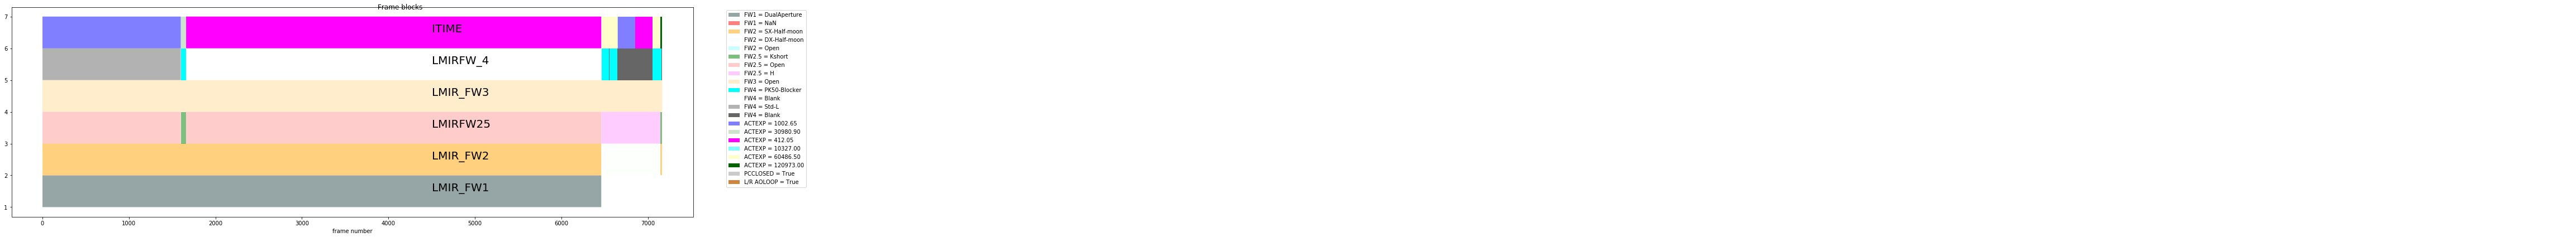

In [22]:
############################################################
# Infomertial: make plot of relevant quantities for classifying the blocks of frames:
# 1. 2 filters
# 2. 3 targets
# 3. 2 nod positions

fig, ax = plt.subplots()
fig.set_size_inches(20,6)

x_pos_of_labels = 4500

# LMIR FW1
ax.fill_between(full_table["FRAMENUM"], 1, 2, where=full_table["LMIR_FW1"]=="DualAperture", \
                facecolor='darkslategray', label='FW1 = DualAperture', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 1, 2, where=full_table["LMIR_FW1"]=="NaN", \
                facecolor='red', label='FW1 = NaN', alpha=0.5)
ax.annotate('LMIR_FW1', xy=(x_pos_of_labels, 1.5), size=20, xycoords='data')


# LMIR FW2
ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="SX-Half-moon", \
                facecolor='orange', label='FW2 = SX-Half-moon', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="DX-Half-moon", \
                facecolor='honeydew', label='FW2 = DX-Half-moon', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="Open", \
                facecolor='aqua', label='FW2 = Open', alpha=0.2)
ax.annotate('LMIR_FW2', xy=(x_pos_of_labels, 2.5), size=20, xycoords='data')


# LMIR FW2.5
ax.fill_between(full_table["FRAMENUM"], 3, 4, where=full_table["LM_FW25"]=="Kshort", \
                facecolor='green', label='FW2.5 = Kshort', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 3, 4, where=full_table["LM_FW25"]=="Open", \
                facecolor='red', label='FW2.5 = Open', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 3, 4, where=full_table["LM_FW25"]=="H", \
                facecolor='magenta', label='FW2.5 = H', alpha=0.2)
ax.annotate('LMIRFW25', xy=(x_pos_of_labels, 3.5), size=20, xycoords='data')


# LMIR FW3
ax.fill_between(full_table["FRAMENUM"], 4, 5, where=full_table["LMIR_FW3"]=="Open", \
                facecolor='orange', label='FW3 = Open', alpha=0.2)
ax.annotate('LMIR_FW3', xy=(x_pos_of_labels, 4.5), size=20, xycoords='data')


# LMIR FW4
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="PK50-Blocker", \
                facecolor='cyan', label='FW4 = PK50-Blocker', alpha=1)
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Blank", \
                facecolor='white', label='FW4 = Blank', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Std-L", \
                facecolor='grey', label='FW4 = Std-L', alpha=0.6)
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Blank", \
                facecolor='black', label='FW4 = Blank', alpha=0.6)
ax.annotate('LMIRFW_4', xy=(x_pos_of_labels, 5.5), size=20, xycoords='data')


# Integration time
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ITIME"]==1002.65, \
                facecolor='b', label='ACTEXP = 1002.65', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ITIME"]==30980.90, \
                facecolor='g', label='ACTEXP = 30980.90', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ITIME"]==412.05, \
                facecolor='magenta', label='ACTEXP = 412.05', alpha=1)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ITIME"]==10327.00, \
                facecolor='cyan', label='ACTEXP = 10327.00', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ITIME"]==60486.50, \
                facecolor='yellow', label='ACTEXP = 60486.50', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ITIME"]==120973.00, \
                facecolor='darkgreen', label='ACTEXP = 120973.00', alpha=1)
ax.annotate('ITIME', xy=(x_pos_of_labels, 6.5), size=20, xycoords='data')


# Phase controlled
ax.fill_between(full_table["FRAMENUM"], 7, 8, where=full_table["PCCLOSED"]==1, \
                facecolor='black', label='PCCLOSED = True', alpha=0.2)
ax.annotate('PCCLOSED', xy=(x_pos_of_labels, 7.5), size=20, xycoords='data')

# SX AO loop
ax.fill_between(full_table["FRAMENUM"], 8, 9, where=full_table["LLOOPON"]==1, \
                facecolor='peru', label='L/R AOLOOP = True', alpha=1)
ax.annotate('LLOOPON', xy=(x_pos_of_labels, 8.5), size=20, xycoords='data')

# SX AO loop
ax.fill_between(full_table["FRAMENUM"], 9, 10, where=full_table["RLOOPON"]==1, \
                facecolor='peru', alpha=1)
ax.annotate('RLOOPON', xy=(x_pos_of_labels, 9.5), size=20, xycoords='data')

# test
'''
ax.fill_between(full_table["FRAMENUM"], 10, 11, where=full_table["RWCCDBIN"]==1, \
                facecolor='peru', alpha=1)
#ax.annotate('RLOOPON', xy=(4500, 9.5), size=20, xycoords='data')
'''

# target
'''
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="ac her", facecolor='orange', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="AC Her", facecolor='orange', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="hd 167275", facecolor='purple', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="HD167275", facecolor='purple', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="HD166842", facecolor='yellow', alpha=0.5)
ax.fill_between(full_table["framenum"], 3, 4, where=full_table["ITIME"]==0.029252, facecolor='green', alpha=0.5)
ax.fill_between(full_table["framenum"], 3, 4, where=full_table["ITIME"]==0.058504, facecolor='grey', alpha=0.5)
'''

ax.legend(loc='upper right', bbox_to_anchor=(1.17, 1))

#plt.xlim([4249,11335])
plt.suptitle("Frame blocks, 190224_fizeau_tests")
plt.xlabel("frame number")
plt.tight_layout()
#plt.axvline(x=6302) # for checking
plt.savefig("junk.pdf", bbox_inches='tight')
#plt.show()